<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../../../Index.ipynb"><< Index</a>
<br>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2024 EUMETSAT <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT)

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies"><img src="https://img.shields.io/badge/open-EUMETLAB-E67E22.svg?style=flat&logo=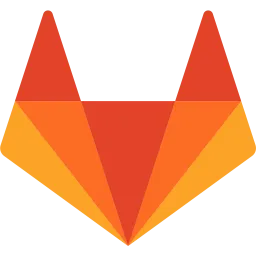" alt="Open in EUMETLAB"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fapplications%2ocean-case-studies/HEAD?urlpath=%2Ftree%2FCase_studies%2FCSM_ocean%2FAtl_Med_anomalies%2FAtlantic_Med_SST_anomalies.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>

</html>

<div class="alert alert-block alert-success">
<h3>Ocean case studies</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>

This notebook has the following prerequisites:
- **<a href="https://eoportal.eumetsat.int/" target="_blank">A EUMETSAT Earth Observation Portal account</a>** to download from the EUMETSAT Data Store
- **<a href="https://data.marine.copernicus.eu/register" target="_blank">A Copernicus Marine Service (CMEMS) account</a>** to download data from the CMEMS Data Store

There are no prerequisite notebooks for this module, but you may wish to look at the following notebooks on using SLSTR data; <br>
- **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-SLSTR" target="_blank">Learn SLSTR (EUMETSAT Gitlab)</a>**

</div>
<hr>

# Sea surface temperature anomalies and trends in the Northern Atlantic and Mediterranean Sea

### Data used

| Dataset | EUMETSAT Data Store<br>collection ID| EUMETSAT collection<br>description | WEkEO dataset ID | WEkEO description |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|
| Sentinel-3 SLSTR level-2P | EO:EUM:DAT:0412 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:0179" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:SL_2_WST___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3ASL_2_WST___&initial=1" target="_blank">Description</a> |
| Global OSTIA SST (Reprocessed) | - | - | EO:MO:DAT:SST_GLO_SST_L4_REP_OBSERVATIONS_010_011 | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AMO%3ADAT%3ASST_GLO_SST_L4_REP_OBSERVATIONS_010_011" target="_blank">Description</a> |
| Global OSTIA SST (Near real-time) | - | - | EO:MO:DAT:SST_GLO_SST_L4_NRT_OBSERVATIONS_010_001 | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AMO%3ADAT%3ASST_GLO_SST_L4_NRT_OBSERVATIONS_010_001" target="_blank">Description</a> |

### Learning outcomes

At the end of this notebook you will know how to;
* how to acquire level-4 SST products from the Copernicus Marine Service (CMEMS)
* how to acquire Copernicus Sentinel-3 SLSTR level-2P SST products from the EUMETSAT Data Store
* how to generate SST climatologies, anomalies and time series
* how to compare SST products and the caveats to doing so

### Outline

In the last few years, we have observed extreme warm temperatures across the global oceans. With several regions recording temperatures of exceptional magnitude, questions are asked about how these measurements fit with historical trends, and what the impacts of extreme temperatures will be on the weather we experience, and marine life. Sea surface temperature measurements from satellites, provide data at suitable temporal and spatial scales to contribute to answering these questions, however product selection is key.

In this python-based Jupyter Notebook we discuss some of the key factors that should inform the choice or data selection when monitoring anomalies, including;
* the fundamental differences between SST variables (e.g. *SSTskin* vs *SSTfnd*), when can they be compared, and with what caveats?
* the differences between climate data record, reprocessed and operational (or near real-time) data and
* what our choices of data say about the conclusions we can draw.

In practice, SST is a broad term that covers a range of measurements. These are well described on figure 1, which gives the Group for High resolution Sea Surface Temperature (<a href="https://www.ghrsst.org/" target="_blank">GHRSST</a>) definitions for a number of key quantities. Infra-red (IR) based satellites (e.g. Sentinel-3 SLSTR) retrieve skin temperature (*SSTskin*), while microwave instruments retrieve sub-skin temperature (*SSTsubskin*). In general, these are the single-sensor variables that are distributed at level-2P.

*Note: satellites measure radiance and brightness temperature and we “retrieve” SST from it. We do not measure SST directly.*

<figure>
  <img src='https://www.ghrsst.org/wp-content/uploads/2021/04/newerSSTdef.gif' width='50%'/>
  <figcaption>Figure 1: GHRSST SST definitions (Credit: GHRSST)</figcaption>
</figure>

From figure 1, it is clear that *SSTskin* and *SSTsubskin* can vary greatly from day to night and from light winds to strong winds. Diurnal warming heats the surface layers substantially during the day, unless the surface layers are mixed by strong winds. The skin effect, which cools the immediate surface due to the equilibrium with the cooler atmosphere, keeps *SSTskin* slightly cooler than *SSTsubskin*. *SSTfnd*, the foundation temperature, represents the level at which the temperature is free from diurnal variability. It is common to find *SSTfnd* distributed as a level-3 or level-4 product as these typically combine data from multiple sensors, which measure at different times of day, and in some cases, incorporate data from both IR and MW retrievals. With this in mind, we already have some idea of when we can compare *SSTskin* and *SSTfnd*, which we will discuss more later in this notebook.

SST records also vary substantially in length, timeliness and quality. Climate data records represent the highest quality data; consistently processed, bias corrected and fully, independently validated. However, they are produced episodically and are not operational, e.g. are not produced daily. They enable us to construct stable and valid climatologies, but not monitor current events. Reprocessed data is consistently processed, and tends to be updated more regularly, but is not quite CDR quality. Operational data, including that available at near real-time, is available quickly but has the lowest quality and, in some cases, may have different processing to it’s analogous reprocessing (where it exists). This presents us with a challenge when we wish to monitor an event, but need to compare to a historical baseline. What part of the anomaly is due to the dynamics of a system, and what part is due to the difference in the processing? In practice, this is hard to ascertain, and we need to take some care.

Lets work with some data and see these impacts in action. We will do this is sections, as shown in the table on contents.

<div class="alert alert-info" role="alert">

## <a id='TOCTOP'></a>Contents

</div>

 1. [Step 1: Setting up our analysis](#section1)
 1. [Step 2: Defining functions](#section2)
 1. [Step 3: Acquiring an SST climatology](#section3)
 1. [Step 4: Preparing the SST climatology](#section4)
 1. [Step 5: Calculating a level-4 SST anomaly](#section5)
 1. [Step 6: Downloading level-2P SLSTR SST granules](#section6)
 1. [Step 7: Calculating a level-2P SST anomaly](#section7)
 1. [Step 8: Downloading and plotting time series](#section8)
 1. [Step 9: Conclusions](#section9)

<hr>

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Setting up our analysis
[Back to top](#TOCTOP)

</div>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../../../../README.md" target="_blank">README</a>**.

In [ ]:
import cartopy                                        # a library that supports mapping and projection
import datetime                                       # a library that allows us to work with dates and times
import glob                                           # a package that helps with file searching
import matplotlib.pyplot as plt                       # a library the provides plotting capability
from matplotlib import gridspec                       # a library the provides plotting capability
import numpy as np                                    # a library that lets us work with arrays; we import this with a new name "np"
import os                                             # a library that allows us access to basic operating system commands
import xarray as xr                                   # a powerful library that helps us work efficiently with multi-dimensional arrays
import eumdac                                         # a tool that helps us download via the eumetsat/data-store
import shutil                                         # a library that allows us access to basic operating system commands
import copernicusmarine                               # a library to help us access CMEMS data
from scipy.interpolate import griddata                # a library that provides interpolation options
from scipy import stats                               # a library that support statistical analysis
import bokeh.plotting as bk                           # a library that supports plotting
from bokeh.palettes import RdBu11, interp_palette     # as above
from bokeh.models import ColorBar, LinearColorMapper  # as above
import pandas as pd                                   # a library for time series analysis
from pathlib import Path                              # a library that helps construct system path objects
import getpass                                        # a library to help us enter passwords
import warnings                                       # a library the helps us to manage warnings

# turn off warnings
warnings.filterwarnings("ignore")

# initiate "bokeh" plot
bk.output_notebook()

# set plot font size
plt.rc('font', size=12)

We need to set a few parameters to run our notebook. Below we will define an output directory ("./products") to store our downloaded data. Then we will set two keys to determing if we want to download OSTIA data from the CMEMS Data Store and SLSLT data from the EUMETSAT Data Store. Downloading data is the slowest part of this notebook. It will take ~15 minutes to download all the data, but only ~2 mins to run without download.

In [ ]:
# Create a download directory for our OLCI products
download_dir = os.path.join(os.getcwd(), "products")
os.makedirs(download_dir, exist_ok=True)

# Data downloading options
download_SLSTR_granules = True

Lets set up a couple of quick plotting variables...

In [ ]:
# Set some mapping vars
color_mapper = LinearColorMapper(interp_palette(RdBu11, 256), low=-4, high=4)
coast = cartopy.feature.NaturalEarthFeature(category='physical', scale='10m', facecolor='none', name='coastline')

And now we coome to the important bit; data selection.

In the cell below we will identify two level-4 foundation temperature (*SSTfnd*) records to work with; the OSTIA multi-year reprocessing collection, and the analogous OSTIA operational collection. The `dataset_???` codes relate to the products as they are stored in the CMEMS Data Store.

In [ ]:
# Multi-year reprocessing
dataset_my = 'METOFFICE-GLO-SST-L4-REP-OBS-SST'

# Near real-time
dataset_nrt = 'METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2'

CMEMS_dataset_variables = ["analysed_sst"]

And now we will define a region of interest for our level-4 products and the time bounds for both the climatology (applied to the reprocessing) and the operational product. We are defining a climatology for a single day, but we will also set an ROI for a time series extraction over the entire period (climatology + operational) for later comparison on a day-by-day basis. We will use this time series data in the companion **<a href="./Med_MHW_2023.ipynb" target="_blank">Marine heatwaves in the Mediterranean Sea in 2023</a>** notebook.

In [ ]:
# L4 ROI
L4_region = [-90.0, 30.0, 45.0, 75.0] # W, S, E, N

# L4 Time series ROI
TS_region = [10, 36, 15, 42] # W, S, E, N

# climatology
start_year = 1982
end_year = 2024
month = datetime.datetime.today().month
day = datetime.datetime.today().day - 2

# operational
nrt_year = datetime.datetime.today().year
formatted_month = datetime.datetime(nrt_year, month, day).strftime('%B')

Finally, lets set the collection ID for our SST data set from the EUMETSAT Data Store. In this case, this code applies to the operational SLSTR SST (*SSTskin*) collection....

In [ ]:
# select collectionID
collectionID = 'EO:EUM:DAT:0412'

...and set our ROI for our L2 region. The operational year defined above will be used to set the time bounds. To facilitate quicker plotting, we will also define a subsample variable which can be increased to speed up plotting, or dropped to 1 for full resolution.

In [ ]:
# L2 ROI
L2_region = [-10, 30, 30, 45] # W, S, E, N
subsample = 2

And now we are ready to go! There are no more quantities to define below. If you wish to adapt this notebook for your own purposes you should be able to do most of it by manipulating the parameters above.

<div class="alert alert-warning" role="alert">

## <a id='section2'></a>2. Defining functions
[Back to top](#TOCTOP)

</div>

To make things simpler we are defining a few functions that contain some code we want to run multiple times in this notebook. These cells are hidden by default, as we won't discuss them much, but you can expand the cells to read the function descriptions if you wish.

In [ ]:
def set_plot():
    '''
    This function does a quick plot initialisation
    '''
    gs = gridspec.GridSpec(3, 1, height_ratios=[10, 1, 1])
    gs.update(wspace=0.01, hspace=0.01)

    return gs

In [ ]:
def embellish_plot(m):
    """Quick function to embellish plots with gridlines and labels

    Args:
        m (axis): the axis to plot into
    Returns:
        None
    """
    # Embellish with gridlines
    m.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='k', facecolor='#546d51', linewidth=0.5), zorder=500)
    g1 = m.gridlines(draw_labels = True, linestyle='--', linewidth=0.5, zorder=1000)
    g1.top_labels = g1.right_labels = False
    g1.xlabel_style = g1.ylabel_style = {'color': '0.5'}

<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Acquiring an SST climatology
[Back to top](#TOCTOP)

</div>

To build our climatology, we will access data from the Copernicus Marine Service using the Copernicus Marine API. This loads data directly into memory, without the need to download anything.

<div class="alert alert-block alert-success">

### Accessing Copernicus Marine Service products

To retrieve the data, we need will use the <a href="https://help.marine.copernicus.eu/en/articles/7949409-copernicus-marine-toolbox-introduction" target="_blank">Copernicus Marine API</a>. This allows us to remotely subset the data and read it directly into memory, for immediate use. If you are working with the recommended Anaconda Python distribution and used the environment file included in this repository (environment.yml) to build this python environment (as detailed in the README), you will already have installed this. If not, you can install the toolkit using;

`conda install -c conda-forge copernicusmarine`

To download data using the Copernicus Marine API, you need to provide credentials. To obtain these, you should register at the <a href="https://data.marine.copernicus.eu/register" target="_blank">Copernicus Marine Service</a> for an account and take note of you `username` and `password`. If you do not already have a local credentials file, you will be prompted to enter your credentials when you run the cell below. This will create the required local credentials file, so that you only need to run this once.

*Note: For more information on authentication options please see this <a href="https://help.marine.copernicus.eu/en/articles/8185007-copernicus-marine-toolbox-credentials-configuration" target="_blank">web article</a>.*

</div>

In [ ]:
# Default location expected by the copernicusmarine package
copernicus_marine_credentials_file = Path(Path.home() / '.copernicusmarine' / '.copernicusmarine-credentials')

# Create it only if it does not already exists
if not copernicus_marine_credentials_file.is_file():
    copernicusmarine.login()

In [ ]:
SST_clim_data = []
for clim_year in range(start_year, 1986):
    SST_clim_data.append(copernicusmarine.open_dataset(
               dataset_id = dataset_my,
               variables=['analysed_sst'],
               minimum_longitude=L4_region[0],
               maximum_longitude=L4_region[2],
               minimum_latitude=L4_region[1],
               maximum_latitude=L4_region[3],
               start_datetime="{clim_year}-{month}-{day}T00:00:00.000Z".format(clim_year = clim_year, month = str(month).zfill(2), day = str(day).zfill(2)),
               end_datetime="{clim_year}-{month}-{day}T00:00:00.000Z".format(clim_year = clim_year, month = str(month).zfill(2), day = str(day).zfill(2)),
               ))

In [ ]:
SST_clim_data = xr.concat(SST_clim_data, dim='time')

<div class="alert alert-info" role="alert">

## <a id='section4'></a>4. Preparing the SST climatology
[Back to top](#TOCTOP)

</div>

Now that we have the files for our climatology (by default, these should be called CLIM_OSTIA_SST_????, and stored in the "products" folder) we need to gather them and create the daily climatology itself. The `xarray` library allows us to open all the downloaded files at once and then take a simple average in time.

In [ ]:
SST_clim = SST_clim_data["analysed_sst"].mean(dim='time')
LON, LAT = np.meshgrid(SST_clim_data["longitude"], SST_clim_data["latitude"]) # for later use....

Now we have our daily climatology, we can go ahead and plot it on our chosen projection (Plate-Carree by default).
*Note: we are calling a couple of our functions to set up (`set_plot`) our plot and embellish it (`embellish_plot`) with gridlines, coasts, land etc.

In [ ]:
# setup figure
fig = plt.figure(figsize=(16, 6), dpi=300)

gs = set_plot()

# plot
axes_m = plt.subplot(gs[0,0], projection=cartopy.crs.PlateCarree())
axes_m.set_extent([L4_region[0], L4_region[2], L4_region[1], L4_region[3]], crs=cartopy.crs.PlateCarree())
p1 = axes_m.pcolormesh(SST_clim_data["longitude"], SST_clim_data["latitude"],
                       SST_clim - 273.15, cmap="RdYlBu_r", transform=cartopy.crs.PlateCarree())
# embellish plot
embellish_plot(axes_m)
axes_m.plot([L2_region[ii] for ii in [0,0,2,2,0]], [L2_region[ii] for ii in [1,3,3,1,1]], c="k", linestyle='--', linewidth=1.0, zorder=10000)
axes_m.annotate("L2 region", (L2_region[0], L2_region[-1]+1), xycoords='data', zorder=10000)
axes_m.plot([TS_region[ii] for ii in [0,0,2,2,0]], [TS_region[ii] for ii in [1,3,3,1,1]], c="0.5", linestyle='--', linewidth=1.0, zorder=10000)
axes_m.annotate("TS region", (TS_region[0], TS_region[1]-2), xycoords='data', c="0.5", zorder=10000)

# colorbar
axes_c = plt.subplot(gs[2,0])
cbar = plt.colorbar(p1, cax=axes_c, orientation='horizontal')
clabel = f"OSTIA level-4 foundation temperature climatology ({start_year}:{end_year}) for {day} {formatted_month}"
cbar.set_label(clabel + ' [$^{o}C$]')
plt.savefig("OSTIA_climatology.png", bbox_inches='tight')

As expected from a long (40 year by default) climatology, most of the SST variabilty has been smoothed out, but we can still some evidence of the Gulf Stream front and some broadly expected patterns of cooling towards the polar regions. We have also indicated the areas we will focus on to look at our SST anomalies and time series (TS).

<div class="alert alert-info" role="alert">

## <a id='section5'></a>5. Calculating a level-4 SST anomaly
[Back to top](#TOCTOP)

</div>

Next, we will calculate the anomaly between our reprocessed SST foundation temperature climatology and our recent operational product. The cells below will download the data we need.

In [ ]:
SST_nrt_data = copernicusmarine.open_dataset(
           dataset_id = dataset_nrt,
           variables=['analysed_sst'],
           minimum_longitude=L4_region[0],
           maximum_longitude=L4_region[2],
           minimum_latitude=L4_region[1],
           maximum_latitude=L4_region[3],
           start_datetime="{nrt_year}-{month}-{day}T00:00:00.000Z".format(nrt_year = nrt_year, month = str(month).zfill(2), day = str(day).zfill(2)),
           end_datetime="{nrt_year}-{month}-{day}T00:00:00.000Z".format(nrt_year = nrt_year, month = str(month).zfill(2), day = str(day).zfill(2)),
           )

In [ ]:
SST_anomaly = np.squeeze(np.array(SST_nrt_data["analysed_sst"] - SST_clim))

Now lets see how our anomaly looks. We will makes this plot with the Bokeh library, as it allows us to interact with the resulting map.

In [ ]:
lonmin, lonmax = np.nanmin(SST_clim_data["longitude"]), np.nanmax(SST_clim_data["longitude"])
latmin, latmax = np.nanmin(SST_clim_data["latitude"]), np.nanmax(SST_clim_data["latitude"])

f1 = bk.figure(width=1280, height=720, x_range=[lonmin, lonmax], y_range=[latmin, latmax])
f1.image(image=[SST_anomaly], x=[lonmin], y=[latmin], dw=[lonmax-lonmin], dh=[latmax-latmin], color_mapper=color_mapper)

for val in coast.geometries():
    coast_lons, coast_lats = val.xy
    f1.line(coast_lons, coast_lats, color='black', line_width=0.5)
    
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, border_line_color=None, location=(0,0))
f1.add_layout(color_bar, 'right')

bk.show(f1)

The anomaly plot clearly shows that, for our chosen data (18th July 2023), much of the Atlantic shows substantial warming. We can also see large anomalies, both positive and negative, around the Gulf Stream, but this is quite common to see in any dynamical system that may have substantial interannual and intra-annual variability. More concerning is the particulary severe warming in the Western Atlantic and Western Mediterranean Sea.

Although we can draw information from this plot, we need to bear a few caveats in mind;
1. The OSTIA climatology we are using is reprocessed data, which is high quality, but not a climate data record. As such, it is hard to draw any climate related conclusions from this.
2. The near-real time operational OSTIA product we are using is **not** the same quality as the reprocessed data, and may not even have the same processing as the reprocessing product. This makes point 1 all the more serious. We can look at events from this, but not infer long term variability without extensive further analysis.

However, it does look really, really bad....

<div class="alert alert-info" role="alert">

## <a id='section6'></a>6. Downloading level-2P SLSTR SST granules
[Back to top](#TOC6TOP)

</div>

Our near real-time OSTIA data is at 0.05 degree resolution in is available with about 18 hours of latency. If we want to take a look at finer scale and/or more recent data, we can choose to calculate our anomaly using 1 km near real-time level-2P SLSTR data. However, we must take *extreme care* with this. Firstly, based on figure 1, we know as we are comparing *SSTskin* with *SSTfnd*, we **must** only use nighttime SLSTR data. Secondly, when we do the comparison we will still have the skin effect contained in the SLSTR observations. We can actually correct for this, but it is beyond the scope of this notebook to do so.

We will download the SLSTR level-2 products from the EUMETAT Data Store.

<div class="alert alert-block alert-success">

### Accessing the EUMETSAT Data Store

To access Copernicus marine data from the <a href="https://data.eumetsat.int " target="_blank">EUMETSAT Data Store</a>, we will use the EUMETSAT Data Access Client (`eumdac`) python package. If you are working with the recommended Anaconda Python distribution and used the environment file included in this repository (environment.yml) to build this python environment (as detailed in the README), you will already have installed this. If not, you can install eumdac using;

`conda install -c eumetsat eumdac`

You can also find the source code on the <a href="https://gitlab.eumetsat.int/eumetlab/data-services/eumdac " target="_blank">EUMETSAT GitLab</a>. Please visit the EUMETSAT user portal for more information on the <a href="https://user.eumetsat.int/data-access/data-store " target="_blank">EUMETSAT Data Store</a> and <a href="https://user.eumetsat.int/resources/user-guides/eumetsat-data-access-client-eumdac-guide " target="_blank">eumdac</a>.

To download data from the EUMETSDAT Data Store via API, you need to provide credentials. To obtain these you should first register at for an <a href="https://eoportal.eumetsat.int/" target="_blank">EUMETSAT Earth Observation Portal account</a>. Once you have an account, you can retrieve your `<your_consumer_key>` and `<your_consumer_secret>` from the <a href="https://api.eumetsat.int/api-key/ " target="_blank">"EUMETSAT Data Store API"</a> page (*Note: you must click the "Show hidden fields" button at the bottom of the page to see the relevant fields*). If you do not already have a local credentials file, you will be prompted to enter your credentials when you run the cell below. This will create the required local credentials file, so that you only need to run this once.

*Note: your key and secret are permanent, so you should take care to never share them*

</div>

In [ ]:
# load credentials
eumdac_credentials_file = Path(Path.home() / '.eumdac' / 'credentials')

if os.path.exists(eumdac_credentials_file):
    consumer_key, consumer_secret = Path(eumdac_credentials_file).read_text().split(',')
else:
    # creating authentication file
    consumer_key = input('Enter your consumer key: ')
    consumer_secret = getpass.getpass('Enter your consumer secret: ')
    try:
        os.makedirs(os.path.dirname(eumdac_credentials_file), exist_ok=True)
        with open(eumdac_credentials_file, "w") as f:
            f.write(f'{consumer_key},{consumer_secret}')
    except:
        pass
        
token = eumdac.AccessToken((consumer_key, consumer_secret))
print(f"This token '{token}' expires {token.expiration}")

If `download_SLSTR_granules` is True, The cell below will fetch all the **night-time** (`orbitdir='ASCENDING'`) near real-time (`timeliness='NR'`) SLSTR granules over our region and time of interest and store them in our downloads directory.

In [ ]:
# create data store object
datastore = eumdac.DataStore(token)

# space/time filter the collection for products
selected_collection = datastore.get_collection(collectionID)

# expand sub-region into a polygon
L2_region_poly = [[L2_region[0], L2_region[1]], [L2_region[0], L2_region[3]], [L2_region[2], L2_region[3]], [L2_region[2], L2_region[1]], [L2_region[0], L2_region[1]]]

count = 0
if download_SLSTR_granules:
    products = selected_collection.search(
        geo='POLYGON(({}))'.format(','.join(["{} {}".format(*coord) for coord in L2_region_poly])),
        dtstart=datetime.datetime(nrt_year, month, day-1, datetime.datetime.now().hour, 0, 0), 
        dtend=datetime.datetime(nrt_year, month, day, datetime.datetime.now().hour, 0, 0),
        timeliness = 'NR', 
        orbitdir= 'ASCENDING')

    print(f"Found {len(products)} matching products")
    
    for product in products:
        count = count + 1
        for entry in product.entries:
            if ".nc" in entry:
                fname = os.path.join(os.getcwd(), 'products', os.path.basename(entry))
                if not os.path.exists(fname):
                    with product.open(entry=entry) as fsrc, open(fname, mode='wb') as fdst:
                        print(f'Downloading ({count}) {fsrc.name}.')
                        shutil.copyfileobj(fsrc, fdst)
                    print(f'Download of file {fsrc.name} finished.')
                else:
                    print(f'{fsrc.name} exists, skipping.')

<div class="alert alert-info" role="alert">

## <a id='section7'></a>7. Calculating a level-2P SST anomaly
[Back to top](#TOCTOP)

</div>

Now lets calculate our anomaly between the SLSTR level-2P granules and the OSTIA level-4 climatology. First we need to collect the files...

In [ ]:
# read SLSTR granules:
files = glob.glob(os.path.join(download_dir,"*L2P_*.nc"))

Now we will plot them. The cell below opens each SLSTR granule in turn and does the following:
* reads in the `sea_surface_temperature` field
* corrects the SST with the `sses_bias` field
* applies the `quality_level` flags to the SST field, keeping only data where the quality level = 5 (the highest)
* interpolates the climatology onto the SLSTR SST field grid
* calculates the anomaly
* and finally plots the granule

Note: for maximum spatial resolution, but slower plotting set `subsample` to 1. For converse, set subsample higher....

In [ ]:
# setup figure
fig = plt.figure(figsize=(16, 9), dpi=300)
plt.rc('font', size=12)

gs = set_plot()

axes_m = plt.subplot(gs[0,0], projection=cartopy.crs.PlateCarree())
axes_m.set_extent([L2_region[0], L2_region[2], L2_region[1], L2_region[3]], crs=cartopy.crs.PlateCarree())

# blank out the background
p1 = axes_m.pcolormesh(SST_clim_data["longitude"], SST_clim_data["latitude"], SST_anomaly*0, cmap="RdBu_r",
                       transform=cartopy.crs.PlateCarree(), vmin=-5, vmax=5)
count = 0
for file in files:
    count = count + 1
    print(f"Processing granule {count} of {len(files)}")
    SST_granule = xr.open_mfdataset(file)

    L2_LON = np.array(SST_granule["lon"][::subsample,::subsample])
    L2_LAT = np.array(SST_granule["lat"][::subsample,::subsample])
    L2_SST = np.squeeze(np.array(SST_granule["sea_surface_temperature"][0, ::subsample,::subsample] + SST_granule["sses_bias"][0, ::subsample,::subsample]))
    L2_QC = np.squeeze(np.array(SST_granule["quality_level"][0, ::subsample,::subsample]))
    L2_SST[L2_QC < 5] = np.nan

    # interp clim to granule
    SST_clim_interp = griddata((LON.ravel(), LAT.ravel()), np.array(SST_clim).ravel(),
                               (L2_LON.ravel(), L2_LAT.ravel()),
                               method="nearest").reshape(np.shape(L2_LON))
   
    p1 = plt.pcolormesh(L2_LON, L2_LAT, L2_SST - SST_clim_interp, cmap="RdBu_r", vmin = -4, vmax = 4)
    SST_granule.close()

embellish_plot(axes_m)

axes_m.plot([TS_region[ii] for ii in [0,0,2,2,0]], [TS_region[ii] for ii in [1,3,3,1,1]], c="0.5", linestyle='--', linewidth=1.0)
axes_m.annotate("TS region", (TS_region[0], TS_region[1]-1), xycoords='data', c="0.5", fontsize=8)

# colorbar
axes_c = plt.subplot(gs[2,0])
cbar = plt.colorbar(p1, cax=axes_c, orientation='horizontal')
clabel = f"SLSTR night-time SST anomaly for {day} {formatted_month} {nrt_year}"
cbar.set_label(clabel + ' [$^{o}C$]')
plt.savefig("SLSTR_anomaly_Med.png", bbox_inches='tight')

Here we can see a similiar view to what we observed in the OSTIA anomaly but at higher spatial resolution and, in practice, with more quickly available data. There is much more mesoscale variability evident in this picture, however we should be careful about how we interpret some of the eddy variability. During the last step, we interpolated the coarse (0.05 degree) OSTIA grid onto the 1 km SLSTR grid. With such a long climatology it is likely that the OSTIA field is very smooth and that the "eddies" we see are in fact expresison of actual dynamics. However, the OSTIA grid is too coarse to capture these features, and with short climatologies we should be wary of introducing artefacts. In general, it is better practice to always interpolate to the lower resolution grid.

As before, although we can draw information from this plot, we need to bear a few caveats in mind;
1. The OSTIA climatology we are using is reprocessed data, which is high quality, but not a climate data record. As such, it is hard to draw any climate related conclusions from this.
2. The near-real time operational SLSTR product we are using is not the same quality as reprocessed data
3. We are comparing *SSTskin* with *SSTfnd* under very specific circumstances (night-time), assuming no diurnal warming effect
4. We are ignoring the skin effect
5. We are comparing data on different grids

That is a lot of caveats! However, this is the only way that we can potentially see the effects of heatwaves on small scale dynamic system in near real-time. For event scale monitoring or anomalies, there is always a trade-off to be made between data accurracy and data availability. We should take care to be clear about this in our analyses. Here the anomaly is very large (+4C!), so we can be confident that the measurement is largely realiable.

*Note: you may also wish to know that OSTIA ingests SLSTR level-2P SST data and uses SLSTR as the reference sensor, so the similarities in the pattern are not so surprising!*

<div class="alert alert-info" role="alert">

## <a id='section8'></a>8. Plotting time series
[Back to top](#TOCTOP)

</div>

We have discussed, relatively extensively, the differences between operational and reprocessed data, but in practice what effects can these have on our anomalies? Lets take a last look at our data from a time series perspective. As before, we will stream data directly from the CMEMS Data Store, but this time write it to file as we will get every daily time-step. The cell below will manage this for us, getting all available "full year" data in our time seres ROI between our start and end dates for both the reprocessed and operational OSTIA collections.

In [ ]:
# Time series
TS_MY_data = copernicusmarine.open_dataset(
           dataset_id = dataset_my,
           variables=['analysed_sst'],
           minimum_longitude=TS_region[0],
           maximum_longitude=TS_region[2],
           minimum_latitude=TS_region[1],
           maximum_latitude=TS_region[3],
           start_datetime="{start_year}-01-01T00:00:00.000Z".format(start_year = start_year),
           end_datetime="{end_year}-12-31T00:00:00.000Z".format(end_year = end_year),
           ).mean(dim=["longitude", "latitude"])

TS_NRT_data = copernicusmarine.open_dataset(
           dataset_id = dataset_nrt,
           variables=['analysed_sst'],
           minimum_longitude=TS_region[0],
           maximum_longitude=TS_region[2],
           minimum_latitude=TS_region[1],
           maximum_latitude=TS_region[3],
           start_datetime="{start_year}-01-01T00:00:00.000Z".format(start_year = start_year),
           end_datetime="{end_year}-12-31T00:00:00.000Z".format(end_year = end_year),
           ).mean(dim=["longitude", "latitude"])

Now we have out time series data (by default, stored as TS_???? in "./products") we can plot it and compare some the operational and reprocessing collections. We will use the `pandas` library and `xarray` to handle the time series, and do some simple linear regression calculations below to give us some context in terms of trends.

In [ ]:
# setup figure
fig = plt.figure(figsize=(16, 9), dpi=300)
plt.rc('font', size=12)

plots = [] ; labels = []; xticks = []; xtick_labels= []

for DS, tag, plot_colour in zip([TS_MY_data, TS_NRT_data], ["MY", "NRT"], ["k", "r"]):
    
    DS["timeordinal"]=(['time'],  [pd.to_datetime(x).toordinal() for x in DS.time.values])

    p1, = plt.plot(DS.timeordinal, DS.analysed_sst - 273.15, linewidth=1, c=plot_colour)
    plots.append(p1)
    labels.append(f"OSTIA foundation temperature ({tag})")

    # calculate trend
    annual = DS.groupby('time.year').mean('time')
    res = stats.linregress(annual.timeordinal[1:-1], annual.analysed_sst[1:-1] - 273.15)
    plt.scatter(annual.timeordinal[1:-1], annual.analysed_sst[1:-1] - 273.15, c=plot_colour)
    p2, = plt.plot(annual.timeordinal[1:-1], res.intercept + res.slope*annual.timeordinal[1:-1],
                   color=plot_colour, linestyle="--", label='fitted line')
    plots.append(p2)
    labels.append(f"Annual trend ({tag})")
    xticks.append([datetime.datetime(ii, 1, 1).toordinal() for ii in annual.year.values])
    xtick_labels.append(annual.year)
    print(f"Trend - R-squared (pvalue): {res.slope*365:.2f} K/year - {res.rvalue**2:.6f} ({res.pvalue**2:.6f})")

plt.xticks(np.array([item for sublist in xticks for item in sublist]),
           labels=np.array([item for sublist in xtick_labels for item in sublist]),
           rotation=90, fontsize=8)

plt.grid(color='0.25', linestyle='--', linewidth=0.5, alpha=0.5)
legend = plt.legend(plots, labels, frameon=False, bbox_to_anchor=(0.5, 1.05), loc='upper center', ncol=4)
plt.xlabel("Date")
plt.ylabel("Foundation temperature [$^{o}$C]")

plt.savefig("OSTIA_timeseries.png", bbox_inches='tight')

<div class="alert alert-warning" role="alert">

## <a id='section9'></a>9. Conclusions
[Back to top](#TOCTOP)

</div>

From our final plot we can see that, in the overlapping period, while there are similarities in the seasonal cycle betwen the reprocessed (black) and operational (black) data sets, clear diffences in the annual values (dots) are evident. We can also see that while a statistically significant warming trend is visible in both time series, the operational data shows almost double to warming rate across the whole record, and the r-squared value is low.

This time series highlights that our definition of a climatology is not only inconsistent between collections, but also not static in time. The definition of our climatology period is key to quantifying our anomalies, and critical to their characterisation in. In the example or marine heatwaves, constructing a moving climatology may be more relevant, especially when it refers to time periods that are more relevant to biological systems. We will discuss this more in the next notebook. 

<hr>
<a href="../../../Index.ipynb"><< Index</a>
<br>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>